# K-Nearest Neighbors
K-Nearest Neighbors is a supervised learning algorithm that can be used for both classification and regression problems.

it is non-paramtric algorithm.lazy learning algorithm.which means it is not dependent on the distance between the points.and it is used in both classification and regression problems.


In [107]:
# example of knn
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [108]:
# load dataset of iris from  seaborn
df = sns.load_dataset('iris')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [109]:
# split the data into X and y
X = df.drop('species', axis=1)
y = df['species']

In [110]:
# load and fit the model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

KNeighborsClassifier()

In [111]:
# pridict the spicies for new data
new_data = [[5.1, 3.5, 1.4, 0.2]]
model.predict(new_data)

c:\Users\nhash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [112]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [113]:
#fit the model
model.fit(X_train, y_train)

KNeighborsClassifier()

In [114]:
#pridict
y_pred = model.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [115]:
#evaluate
from sklearn.metrics import accuracy_score

# confusion matrix
from sklearn.metrics import confusion_matrix
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

<Axes: >

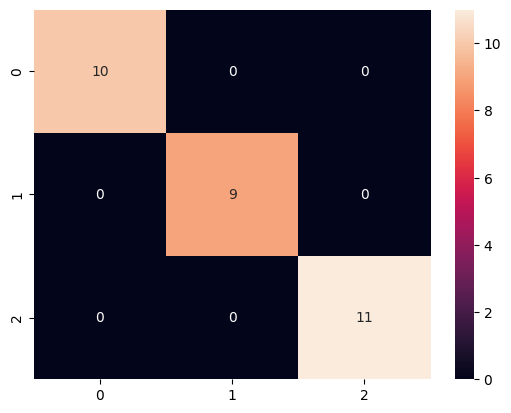

In [116]:
#plot confution matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)



In [117]:
# regression problem on tips dataset
# load dataset
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [118]:
# split the data into X and y
X = df.drop('tip', axis=1)
y = df['tip']

In [119]:
# encode the categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['sex'] = le.fit_transform(X['sex'])
X['smoker'] = le.fit_transform(X['smoker'])
X['day'] = le.fit_transform(X['day'])
X['time'] = le.fit_transform(X['time'])

In [120]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# import and run the model
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5,metric='minkowski',p=2)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [122]:
# pridict
y_pred = model.predict(X_test)
y_pred

array([2.884, 1.922, 3.978, 3.516, 1.898, 3.124, 4.094, 1.824, 2.218,
       2.888, 3.026, 2.07 , 1.772, 2.322, 1.966, 3.05 , 3.188, 3.608,
       2.562, 4.262, 3.33 , 2.78 , 2.358, 1.678, 3.476, 1.786, 1.678,
       2.992, 2.538, 6.346, 4.25 , 2.678, 2.928, 2.994, 2.364, 3.546,
       1.74 , 4.262, 1.896, 3.962, 1.988, 2.244, 3.614, 2.228, 1.758,
       2.214, 2.448, 2.946, 2.276])

In [123]:
# evaluate ROOT mean , R2 ,RMSE
# root mean square
import numpy as np
print(np.sqrt(mean_squared_error(y_test, y_pred)))

# R2
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

0.9155471209130881
0.3294034029001649
0.8382265306122448
